# Notebook overview
This notebook allows running pre-trained model for instance segmentaiton in **confocal cyst images** using the [BiaPy library](https://github.com/danifranco/BiaPy).

**Authors**: Daniel Franco-Barranco, Ignacio Arganda-Carreras.

<font color='red'><b>NOTE</b></font>: right now, this notebook makes use of the model M2 of our paper.

## Expected inputs and outputs
**Inputs**

This notebook expects two folders as input:
* An input folder with **3D TIFF images** to be processed.
* An output folder to store the segmentation results.

**Outputs**

If the execution is successful, the following files will be created for each input image:
* A **TIFF image** with the cell instances.

# Prepare the environment

## Manage file(s) source
---

The input folder can be provided using two different options: either by directly uploading the folder, or by using a folder contained in Google Drive.

### Option 1: use your local files and upload them to the notebook
---
You will be prompted to upload your files to Colab and they will be stored under `/content/data/`.

In [ ]:
#@markdown ##Play the cell to upload local files
from google.colab import files
!mkdir -p /content/data/train/x 
%cd /content/data/train/x
uploaded = files.upload()
%cd /content

/content/data/train/x


/content


### Option 2: mount your Google Drive
---
To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [1]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



## Check for GPU access
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

Go to **Runtime -> Change the Runtime type**

**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

**Accelerator: GPU** *(Graphics processing unit)*

# First steps


## Paths to load input images and save output files
---
If option 1 was used above, define ``data_path`` as '/content/data', and ``output_path`` as '/content/out'. And make sure you donwload the results from the '/content/out' folder later!

Otherwise, introduce here the paths to your innput files and to the folder where you want to store the results.

In [2]:
#@markdown #####Path to images
data_path = '/content/gdrive/MyDrive/input' #@param {type:"string"}

#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/gdrive/MyDrive/output' #@param {type:"string"}

## Install BiaPy library


In [3]:
#@markdown ##Play to install BiaPy and its dependences

import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms                                                                           

# Clone the repo
%cd /content/ 
if not os.path.exists('BiaPy'):
    !git clone https://github.com/danifranco/BiaPy.git
    !pip install --upgrade --no-cache-dir gdown
    sys.path.insert(0, 'BiaPy')
    %cd /content/BiaPy
    
    # Install dependencies 
    !pip install git+https://github.com/aleju/imgaug.git
    !pip install numpy_indexed yacs
    
    job_name = "cartocell"
    # Download .yaml file and model weights 
    %cd /content/
    !gdown --id 1Z4SLO8ISeo0UmmYeyG-Dz93y7hoMZCR5
    !gdown --id 1rnTls60MrndQHyyLgwwKr5UNZbjytnCF

    # Modify template according to defined variable paths
    import fileinput

    for line in fileinput.input("/content/"+str(job_name)+".yaml", inplace=True):
        if 'edit_test_path_here' in line:
            print('        PATH: {}'.format(data_path)) 
        else:
            print('{}'.format(line), end='')

    import yaml
    with open("/content/"+str(job_name)+".yaml", 'r') as stream:
        try:
            biapy_config = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)

/content
Cloning into 'BiaPy'...
remote: Enumerating objects: 15016, done.
remote: Counting objects: 100% (1085/1085), done.
remote: Compressing objects: 100% (514/514), done.
remote: Total 15016 (delta 725), reused 910 (delta 561), pack-reused 13931
Receiving objects: 100% (15016/15016), 815.97 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (7994/7994), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14840 sha256=dcad4cc2b7d4f0a1c1ba4e7e98871534023641d083080ca115f2daceda14fa63
  Stored in directory: /tmp/pip-ephem-wheel-cache-heegywe8/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      S

# Download pretrained model and get detections


In [8]:
#@markdown ##Play to pass images through the model

# Run the code 
%cd '/content/BiaPy'
!python -u main.py --config '/content/'{job_name}'.yaml' --result_dir {output_path} --name {job_name} --run_id 1 --gpu 0



/content/BiaPy
Date: 2022-11-14 08:44:23
Arguments: Namespace(config='/content/cartocell.yaml', gpu='0', name='cartocell', result_dir='/content/gdrive/MyDrive/Universidad/Thesis/Thesis/papers/Sevilla/notebook/output', run_id=1)
Job: cartocell_1
Python       : 3.7.15 (default, Oct 12 2022, 19:14:55) 
Keras        : 2.9.0
Tensorflow   : 2.9.2
Num GPUs Available:  1
Python process limited to 1 thread
Configuration details:
AUGMENTOR:
  AFFINE_MODE: constant
  AUG_NUM_SAMPLES: 10
  AUG_SAMPLES: True
  BRIGHTNESS: True
  BRIGHTNESS_EM: False
  BRIGHTNESS_EM_FACTOR: (-0.1, 0.1)
  BRIGHTNESS_EM_MODE: 3D
  BRIGHTNESS_FACTOR: (0.1, 0.15)
  BRIGHTNESS_MODE: 3D
  CBLUR_DOWN_RANGE: (2, 8)
  CBLUR_INSIDE: True
  CBLUR_SIZE: (0.2, 0.4)
  CHANNEL_SHUFFLE: False
  CMIX_SIZE: (0.2, 0.4)
  CNOISE_NB_ITERATIONS: (1, 3)
  CNOISE_SCALE: (0.05, 0.1)
  CNOISE_SIZE: (0.2, 0.4)
  CONTRAST: False
  CONTRAST_EM: False
  CONTRAST_EM_FACTOR: (-0.1, 0.1)
  CONTRAST_EM_MODE: 3D
  CONTRAST_FACTOR: (-0.1, 0.1)
  CONTR

# Visualize some results


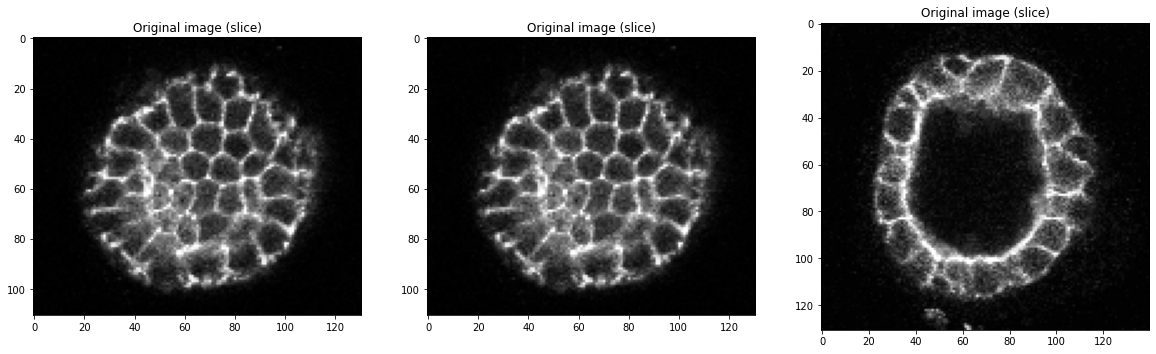

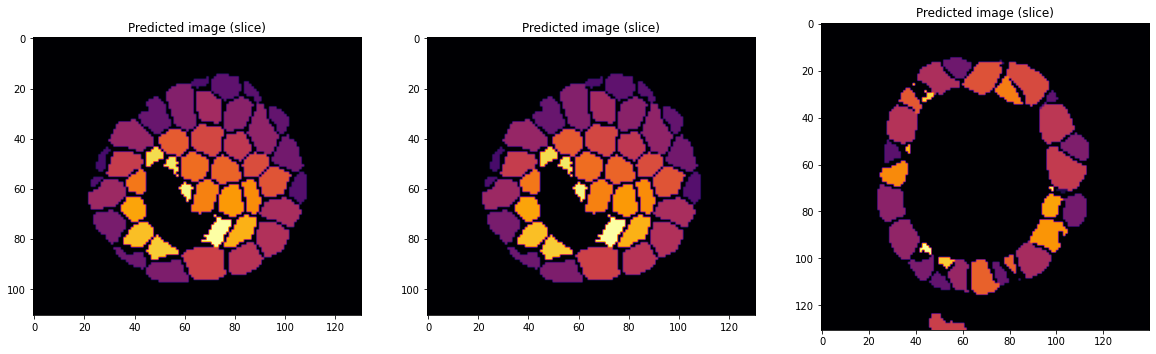

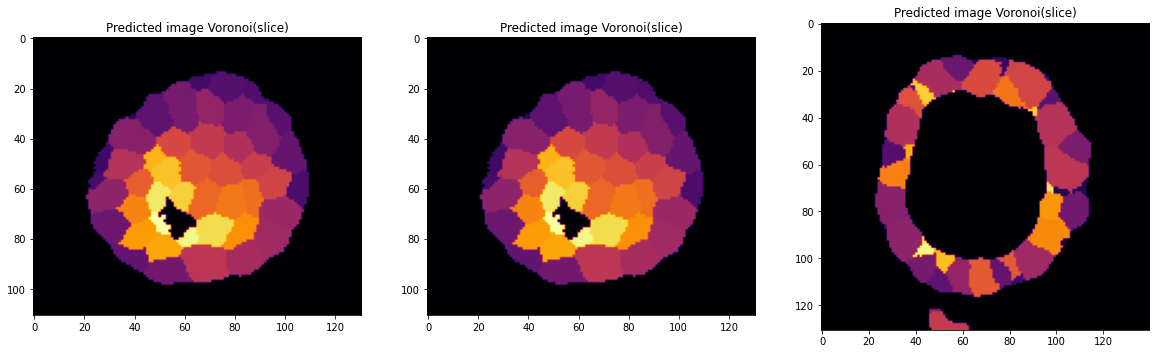

In [25]:
final_results = os.path.join(output_path, job_name, 'results', "cartocell_1")

instance_results = os.path.join(final_results, "per_image_instances")
voronoi_results = os.path.join(final_results, "per_image_instances_voronoi")

#@markdown ##Play to visualize some results
from IPython.display import Markdown as md
md("After this last step, the resulting images should be placed in {}".format(final_results))
# Show a few examples to check that they have been stored correctly 
%matplotlib inline
import matplotlib
from numpy.random import randint, seed
from matplotlib import pyplot as plt

ids = sorted(next(os.walk(instance_results))[2])
ids_vor = sorted(next(os.walk(voronoi_results))[2])

# cmap = plt.cm.prism
# cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = (0,0,0,1)
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm', cmaplist, cmap.N)

choosen_images = randint(0, len(ids), 3) 
seed(1)

test_samples = []
test_sample_preds = []
test_sample_vor = []

aux = imread(os.path.join(data_path, ids[choosen_images[0]]))
sl = int(len(aux)/2)
test_samples.append(aux[sl])
aux = imread(os.path.join(instance_results, ids[choosen_images[0]]))[sl].astype(np.uint64)
if np.max(aux)**4 < np.iinfo(aux.dtype).max: aux = aux**4
test_sample_preds.append(aux)
aux = imread(os.path.join(voronoi_results, ids_vor[choosen_images[0]]))[sl].astype(np.uint64)
if np.max(aux)**4 < np.iinfo(aux.dtype).max: aux = aux**4
test_sample_vor.append(aux)
aux = imread(os.path.join(data_path, ids[choosen_images[1]]))
sl = int(len(aux)/2)
test_samples.append(aux[sl])
aux = imread(os.path.join(instance_results, ids[choosen_images[1]]))[sl].astype(np.uint64)
if np.max(aux)**4 < np.iinfo(aux.dtype).max: aux = aux**4
test_sample_preds.append(aux)
aux = imread(os.path.join(voronoi_results, ids_vor[choosen_images[1]]))[sl].astype(np.uint64)
if np.max(aux)**4 < np.iinfo(aux.dtype).max: aux = aux**4
test_sample_vor.append(aux)
aux = imread(os.path.join(data_path, ids[choosen_images[2]]))
sl = int(len(aux)/2)
test_samples.append(aux[sl])
aux = imread(os.path.join(instance_results, ids[choosen_images[2]]))[sl].astype(np.uint64)
if np.max(aux)**4 < np.iinfo(aux.dtype).max: aux = aux**4
test_sample_preds.append(aux)
aux = imread(os.path.join(voronoi_results, ids_vor[choosen_images[2]]))[sl].astype(np.uint64)
if np.max(aux)**4 < np.iinfo(aux.dtype).max: aux = aux**4
test_sample_vor.append(aux)

# Show predicted images
for i in range(3):
    plt.figure(figsize=(20,20))
    for j in range(3):
        plt.subplot(i+1, 3, j+1)
        if i == 0:
            plt.title("Original image (slice)")
            plt.imshow(test_samples[j], cmap='gray')          
        elif i == 1:
            plt.title("Predicted image (slice)")
            plt.imshow(test_sample_preds[j], cmap="inferno")        
        else:
            plt.title("Predicted image Voronoi(slice)")
            plt.imshow(test_sample_vor[j], cmap="inferno")
    plt.show()


In [ ]:
#@markdown ###Play to see the path where the output files reside. There you will find for each test sample (* its filename):
#@markdown #### - * A **TIFF image** with the cell instances.

final_results = os.path.join(output_path, job_name, 'results', "cartocell_1")

instance_results = os.path.join(final_results, "per_image_instances")
voronoi_results = os.path.join(final_results, "per_image_instances_voronoi")

peak_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image_local_max_check')
print("Output files in {}".format(instance_results))
print("Voronoi applied output files in {}".format(voronoi_results))

Output files in /content/gdrive/MyDrive/Universidad/Thesis/Thesis/papers/Sevilla/notebook/output/cartocell/results/cartocell_1/per_image_instances
Voronoi applied output files in /content/gdrive/MyDrive/Universidad/Thesis/Thesis/papers/Sevilla/notebook/output/cartocell/results/cartocell_1/per_image_instances_voronoi
